# Example output from stroke outcome model

In this notebook we provide an example of the output from the stroke outcome model assuming IVT is delivered at 90 mins and MT is delivered at 120 mins after stroke onset.

The model provides a sample distribution of mRS scores for 1,000 patients.

## Load packages and data file

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from outcome_utilities.clinical_outcome import Clinical_outcome

import warnings
warnings.filterwarnings("ignore")

# Load mRS distributions
mrs_dists = pd.read_csv(
    './outcome_utilities/mrs_dist_probs_cumsum.csv', index_col='Stroke type')

In [2]:
# Set up MatPlotLib
%matplotlib inline
# Change default colour scheme:
plt.style.use('seaborn-colorblind')

## View the loaded mRS distributions
For each stroke type (by row) the the imported table shows the cumulative proportion of patients with each mRS score (0-6)

In [3]:
mrs_dists

,0,1,2,3,4,5,6
Stroke type,,,,,,,
pre_stroke_nlvo,0.582881,0.745419,0.848859,0.951082,0.993055,1.000000,1.0
pre_stroke_nlvo_ivt_deaths,0.576469,0.737219,0.839522,0.940620,0.982131,0.989000,1.0
pre_stroke_lvo,0.417894,0.560853,0.679283,0.843494,0.957269,1.000000,1.0
pre_stroke_lvo_ivt_deaths,0.403644,0.541728,0.656119,0.814731,0.924626,0.965900,1.0
pre_stroke_lvo_mt_deaths,0.401178,0.538419,0.652112,0.809754,0.918978,0.960000,1.0
no_treatment_nlvo,0.197144,0.460000,0.580032,0.707768,0.855677,0.917702,1.0
no_effect_nlvo_ivt_deaths,0.197271,0.460000,0.577583,0.702252,0.845244,0.904454,1.0
t0_treatment_nlvo_ivt,0.429808,0.630000,0.738212,0.848427,0.929188,0.956300,1.0
no_treatment_lvo,0.050000,0.129000,0.265000,0.429000,0.676000,0.811000,1.0


## Set up outcome model and get output

In [4]:
# Set up outcome model
outcome_model = Clinical_outcome(mrs_dists)

# Get outputs
time_to_ivt = 90
time_to_mt = 120
outcomes = outcome_model.calculate_outcomes(
    time_to_ivt, time_to_mt, patients=10000, random_spacing=False)

## Show raw model output

The model output is a dictionary of results.

In [5]:
outcomes

{'lvo_untreated_probs': array([0.05 , 0.079, 0.136, 0.164, 0.247, 0.135, 0.189]),
 'nlvo_untreated_probs': array([0.1972, 0.2628, 0.12  , 0.1278, 0.1478, 0.0621, 0.0823]),
 'lvo_ivt_probs': array([0.0926, 0.0865, 0.1298, 0.1581, 0.2195, 0.1171, 0.1964]),
 'lvo_mt_probs': array([0.2076, 0.1265, 0.1371, 0.1689, 0.1694, 0.0778, 0.1127]),
 'nlvo_ivt_probs': array([0.366 , 0.2248, 0.1128, 0.1164, 0.0941, 0.033 , 0.0529]),
 'lvo_untreated_mean_utility': 0.33261,
 'nlvo_untreated_mean_utility': 0.5993989999999999,
 'lvo_ivt_mean_utility': 0.37059999999999993,
 'lvo_mt_mean_utility': 0.526139,
 'nlvo_ivt_mean_utility': 0.7128859999999999,
 'lvo_ivt_added_utility': 0.03798999999999991,
 'lvo_mt_added_utility': 0.193529,
 'nlvo_ivt_added_utility': 0.113487,
 'lvo_untreated_cum_probs': array([0.05 , 0.129, 0.265, 0.429, 0.676, 0.811, 1.   ]),
 'nlvo_untreated_cum_probs': array([0.1972, 0.46  , 0.58  , 0.7078, 0.8556, 0.9177, 1.    ]),
 'lvo_ivt_cum_probs': array([0.0926, 0.1791, 0.3089, 0.467 , 0

## Plot mRS distributions

mRS distributions

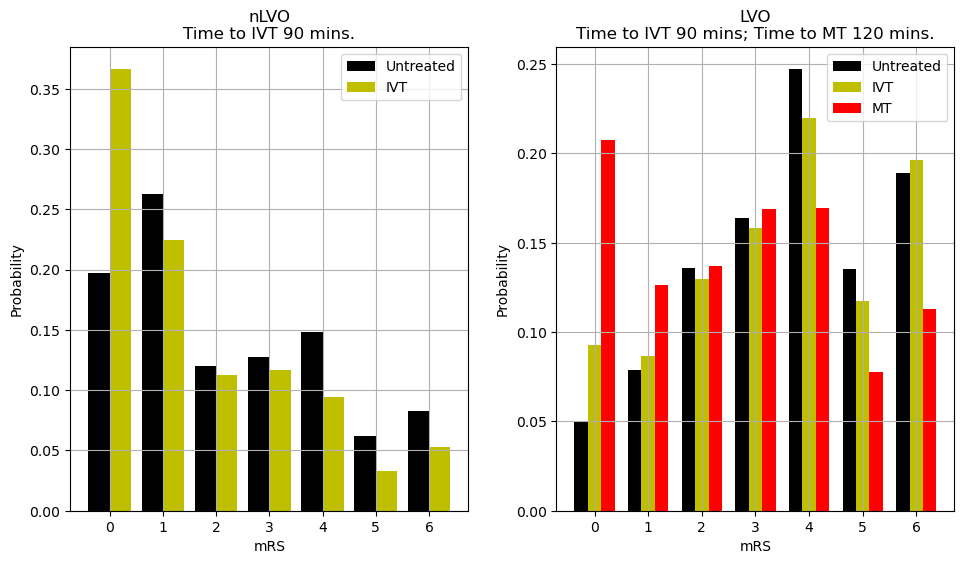

In [6]:
fig = plt.figure(figsize=(10,6))

# nLVO
x = np.arange(7)
width = 0.4
ax1 = fig.add_subplot(121)
y = outcomes['nlvo_untreated_probs']
ax1.bar(x - width/2, y, width = width, label='Untreated', color='k')
y = outcomes['nlvo_ivt_probs']
ax1.bar(x + width/2, y, width = width, label='IVT', color='y')
title = f'nLVO\nTime to IVT {time_to_ivt} mins.'
ax1.set_title(title)
ax1.set_xlabel('mRS')
ax1.set_ylabel('Probability')
ax1.grid()
ax1.legend()

# LVO
width = 0.25
x = np.arange(7)
ax2 = fig.add_subplot(122)
y = outcomes['lvo_untreated_probs']
ax2.bar(x - width, y, width = width, label='Untreated', color='k')
y = outcomes['lvo_ivt_probs']
ax2.bar(x, y, width = width, label='IVT', color='y')
y = outcomes['lvo_mt_probs']
ax2.bar(x + width, y, width = width, label='MT', color='r')
title = f'LVO\nTime to IVT {time_to_ivt} mins; Time to MT {time_to_mt} mins.'
ax2.set_title(title)
ax2.set_xlabel('mRS')
ax2.set_ylabel('Probability')
ax2.grid()
ax2.legend()

plt.tight_layout(pad=2)
plt.savefig('./images/demo_mrs_dists.jpg', dpi=300)
plt.show()

Cumulative mRS distributions

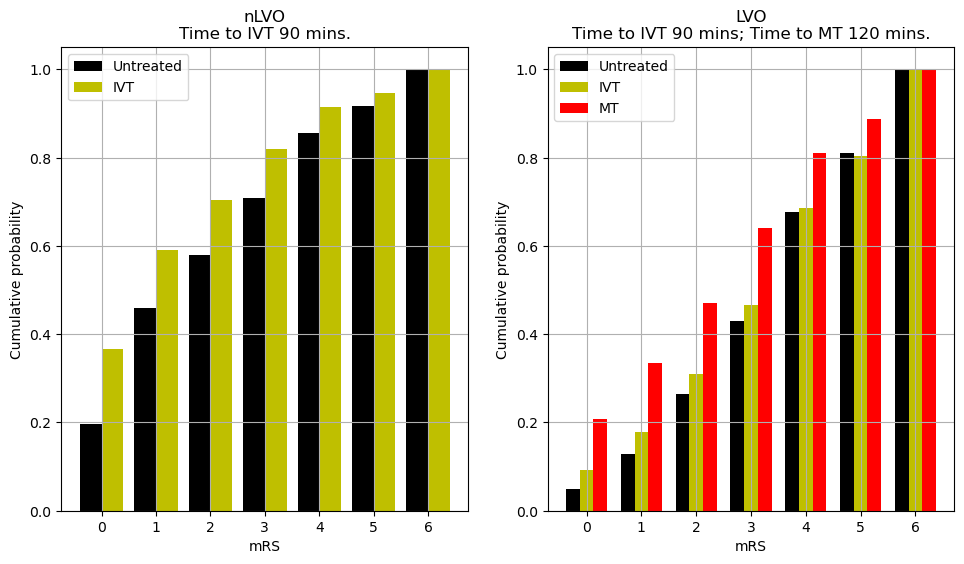

In [7]:
fig = plt.figure(figsize=(10,6))

# nLVO
x = np.arange(7)
width = 0.4
ax1 = fig.add_subplot(121)
y = np.cumsum(outcomes['nlvo_untreated_probs'])
ax1.bar(x - width/2, y, width = width, label='Untreated', color='k')
y = np.cumsum(outcomes['nlvo_ivt_probs'])
ax1.bar(x + width/2, y, width = width, label='IVT', color='y')
title = f'nLVO\nTime to IVT {time_to_ivt} mins.'
ax1.set_title(title)
ax1.set_xlabel('mRS')
ax1.set_ylabel('Cumulative probability')
ax1.grid()
ax1.legend()

# LVO
width = 0.25
x = np.arange(7)
ax2 = fig.add_subplot(122)
y = np.cumsum(outcomes['lvo_untreated_probs'])
ax2.bar(x - width, y, width = width, label='Untreated', color='k')
y = np.cumsum(outcomes['lvo_ivt_probs'])
ax2.bar(x, y, width = width, label='IVT', color='y')
y = np.cumsum(outcomes['lvo_mt_probs'])
ax2.bar(x + width, y, width = width, label='MT', color='r')
title = f'LVO\nTime to IVT {time_to_ivt} mins; Time to MT {time_to_mt} mins.'
ax2.set_title(title)
ax2.set_xlabel('mRS')
ax2.set_ylabel('Cumulative probability')
ax2.grid()
ax2.legend()

plt.tight_layout(pad=2)
plt.savefig('./images/demo_cum_mrs_dists.jpg', dpi=300)
plt.show()

Plot changes in mRS proportions with treatment

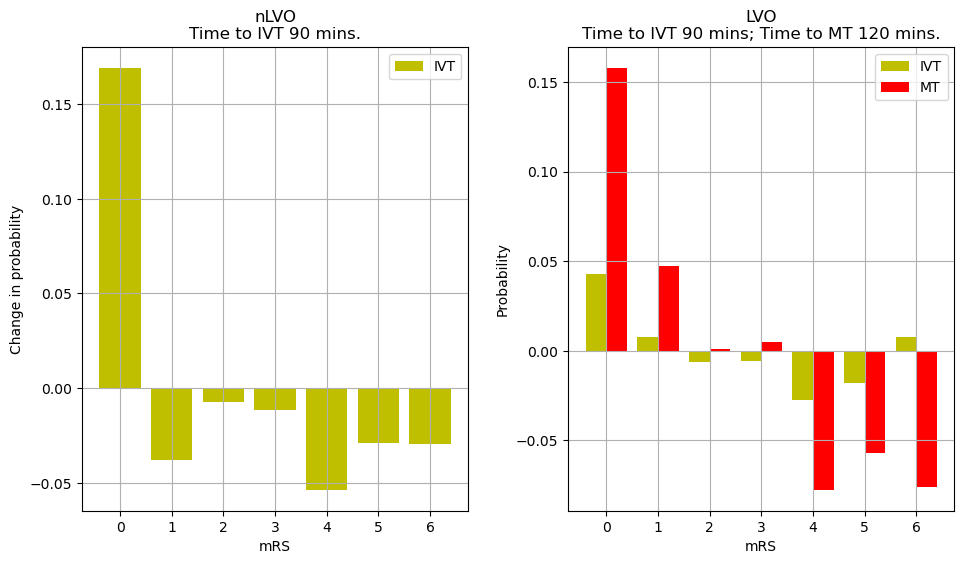

In [8]:
fig = plt.figure(figsize=(10,6))

# nLVO
x = np.arange(7)
width = 0.8
ax1 = fig.add_subplot(121)
y = outcomes['nlvo_ivt_shift']
ax1.bar(x, y, width = width, label='IVT', color='y')
title = f'nLVO\nTime to IVT {time_to_ivt} mins.'
ax1.set_title(title)
ax1.set_xlabel('mRS')
ax1.set_ylabel('Change in probability')
ax1.grid()
ax1.legend()

# LVO
width = 0.4
x = np.arange(7)
ax2 = fig.add_subplot(122)
y = outcomes['lvo_ivt_shift']
ax2.bar(x - width/2, y, width = width, label='IVT', color='y')
y = outcomes['lvo_mt_shift']
ax2.bar(x + width/2, y, width = width, label='MT', color='r')
title = f'LVO\nTime to IVT {time_to_ivt} mins; Time to MT {time_to_mt} mins.'
ax2.set_title(title)
ax2.set_xlabel('mRS')
ax2.set_ylabel('Probability')
ax2.grid()
ax2.legend()

plt.tight_layout(pad=2)
plt.savefig('./images/demo_mrs_shifts.jpg', dpi=300)
plt.show()

## Other stats

### Mean mRS

In [9]:
print('Mean mRS')
print('--------')
print('LVO untreated:', outcomes['lvo_untreated_mean_mRS'])
print('LVO IVT:', outcomes['lvo_ivt_mean_mRS'])
print('LVO MT:', outcomes['lvo_mt_mean_mRS'])
print('nLVO untreated:', outcomes['nlvo_untreated_mean_mRS'])
print('nLVO IVT:', outcomes['nlvo_ivt_mean_mRS'])

Mean mRS
--------
LVO untreated: 3.64
LVO IVT: 3.4623
LVO MT: 2.6502
nLVO untreated: 2.2817
nLVO IVT: 1.6584


### Mean shift in mRS

In [10]:
print('Mean mRS shift')
print('--------------')
print('LVO IVT:', outcomes['lvo_ivt_mean_shift'])
print('LVO MT:', outcomes['lvo_mt_mean_shift'])
print('nLVO IVT:', outcomes['nlvo_ivt_mean_shift'])

Mean mRS shift
--------------
LVO IVT: -0.1777
LVO MT: -0.9898
nLVO IVT: -0.6233


### The proportion of patients with improved mRS
Assuming all patients move up the mRS.

In [11]:
print('Proportion improved')
print('-------------------')
print('LVO IVT:', outcomes['lvo_ivt_improved'])
print('LVO MT:', outcomes['lvo_mt_improved'])
print('nLVO IVT:', outcomes['nlvo_ivt_improved'])

Proportion improved
-------------------
LVO IVT: 0.1851
LVO MT: 0.7999
nLVO IVT: 0.6125


### Utility-weighted mRS outcomes

In addition to mRS, we may calculate utility-weighted mRS (UW-mRS).

UW-mRS incorporates both treatment effect and patient perceived quality of life as a single outcome measure for stroke trials.

UW-mRS scores are based on a pooled analysis of 2,000+ patients. 
From  Wang X, Moullaali TJ, Li Q, Berge E, Robinson TG, Lindley R, et al.
Utility-Weighted Modified Rankin Scale Scores for the Assessment of Stroke
Outcome. Stroke. 2020 Aug 1;51(8):2411-7.

| mRS Score | 0    | 1    | 2    | 3    | 4    | 5     | 6    |
|-----------|------|------|------|------|------|-------|------|
| Utility   | 0.97 | 0.88 | 0.74 | 0.55 | 0.20 | -0.19 | 0.00 |

In [12]:
x = outcomes['lvo_untreated_mean_utility']
print(f'LVO untreated UW-mRS: {x:0.3f}')

x1 = outcomes['lvo_ivt_mean_utility']
x2 = outcomes['lvo_ivt_added_utility']
print(f'LVO IVT UW-mRS: {x1:0.3f} (added UW-mRS: {x2:0.3f})')

x1 = outcomes['lvo_mt_mean_utility']
x2 = outcomes['lvo_mt_added_utility']
print(f'LVO MT UW-mRS: {x1:0.3f} (added UW-mRS: {x2:0.3f})')

x = outcomes['nlvo_untreated_mean_utility']
print(f'nLVO untreated UW-mRS: {x:0.3f}')

x1 = outcomes['nlvo_ivt_mean_utility']
x2 = outcomes['nlvo_ivt_added_utility']
print(f'nLVO IVT UW-mRS: {x1:0.3f} (added UW-mRS: {x2:0.3f})')



LVO untreated UW-mRS: 0.333
LVO IVT UW-mRS: 0.371 (added UW-mRS: 0.038)
LVO MT UW-mRS: 0.526 (added UW-mRS: 0.194)
nLVO untreated UW-mRS: 0.599
nLVO IVT UW-mRS: 0.713 (added UW-mRS: 0.113)


## An example showing how untreated and treated mRS are compared at a patient level

In the example below we look at the treatment effect of 5 LVO patients treated with MT.

After calculating the treated mRS distribution at the specified treatment time, we can sample random patients by sampling from a uniform 0-1 distribution and using that same sampled value for each patient compare their location on untreated and treated distributions.

For illustration we use more evenly spaced patient values (rather than random), and we can see:

* Patient #1 (P=0.1): mRS untreated = 1, mRS treated = 0
* Patient #2 (P=0.3): mRS untreated = 3, mRS treated = 1
* Patient #3 (P=0.5): mRS untreated = 4, mRS treated = 3
* Patient #4 (P=0.7): mRS untreated = 5, mRS treated = 4
* Patient #5 (P=0.9): mRS untreated = 6, mRS treated = 6

This model is likely a simplification of actual effects, but should capture the average effect of treatment well, and provide a good guide to the proportion of patients who will move at least one mRS unit with treatment.

In [13]:
from outcome_utilities.dist_plot import draw_horizontal_bar, \
    draw_connections

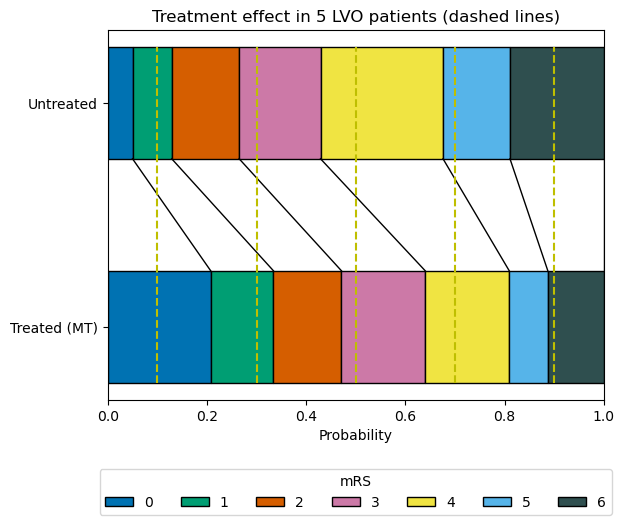

In [14]:
bar_1 = outcomes['lvo_untreated_probs']
bar_2 = outcomes['lvo_mt_probs']

y_vals = [0, 1]
y_labels = ['Treated (MT)', 'Untreated']
    
# Draw no effect distribution
draw_horizontal_bar(bar_2, y_vals[0])

# Add legend now to prevent doubling all the labels:
plt.legend(loc='center',ncol=7, title='mRS', 
           bbox_to_anchor=[0.5,0.0,0.0,-0.5])   # Legend below axis.

# Draww t=0 distribution
draw_horizontal_bar(bar_1, y_vals[1])

# Darw connecting lines
draw_connections(bar_1, bar_2)

for x in [0.1, 0.3, 0.5, 0.7, 0.9]:
    plt.vlines(x, -0.25, 1.25, colors='y', linestyles='dashed')
    
# Add general content
plt.xlabel('Probability')
plt.title('Treatment effect in 5 LVO patients (dashed lines)')
plt.xlim(0,1)
plt.yticks(y_vals, y_labels)
plt.savefig(f'./images/treatment_shift.jpg', dpi=300, bbox_inches='tight', 
    pad_inches=0.2)
plt.show()

# An example of how added utility is calculated

Gather distributions:

In [15]:
# Probability distributions:
mRS_dist1 = outcomes['lvo_ivt_probs']
mRS_dist2 = outcomes['lvo_untreated_probs'] 

# Cumulative probability distributions:
mRS_dist1_cum = outcomes['lvo_ivt_cum_probs']
mRS_dist2_cum = outcomes['lvo_untreated_cum_probs']

Function to find the added utility along the distributions:

In [16]:
from outcome_utilities.added_utility_between_dists import \
    find_added_utility_between_dists, find_added_utility_best_worst

In [17]:
(mRS_dist_mix, weighted_added_utils, x1_list, x2_list,
    u1_list, u2_list) = find_added_utility_between_dists(mRS_dist1_cum, 
    mRS_dist2_cum, return_all=1)

Compare the calculated added utilities here and from the outcome model directly:

In [18]:
print(f"{weighted_added_utils[-1]:1.4f}")
print(f"{outcomes['lvo_ivt_added_utility']:1.4f}")

0.0380
0.0380


These numbers might not be identical to high precision because this calculation uses the full distribution whereas the outcome model samples a fixed number of points within the distribution. The numbers will become closer when a higher number of patients is used in the outcome model.

Assume this proportion of patients are treated:

In [19]:
prop_treated = 0.85

Make a weighted distribution where the patients who don't receive any treatment are distributed equally:

In [20]:
weighted_added_utils_equal = weighted_added_utils*prop_treated

In the best case, most or all of the patients who do not receive treatment are those who _would not_ have seen an improvement in mRS even if treated. If necessary, treatment is first withheld from the patients who would have seen the smallest increase in utility. 

In the worst case, most or all of the patients who do not receive treatment are those who _would_ have seen an improvement in mRS if treated. Treatment is first withheld from the patients who would have seen the largest increase in utility.

Make the best- and worst-case scenarios:

In [21]:
mRS_diff_mix = np.diff(mRS_dist_mix, prepend=0.0)

weighted_added_utils_best, weighted_added_utils_worst = (
    find_added_utility_best_worst(prop_treated, mRS_diff_mix,
    x1_list, x2_list, u1_list, u2_list))

Plot the cumulative added utility as each mRS bin is taken into account:

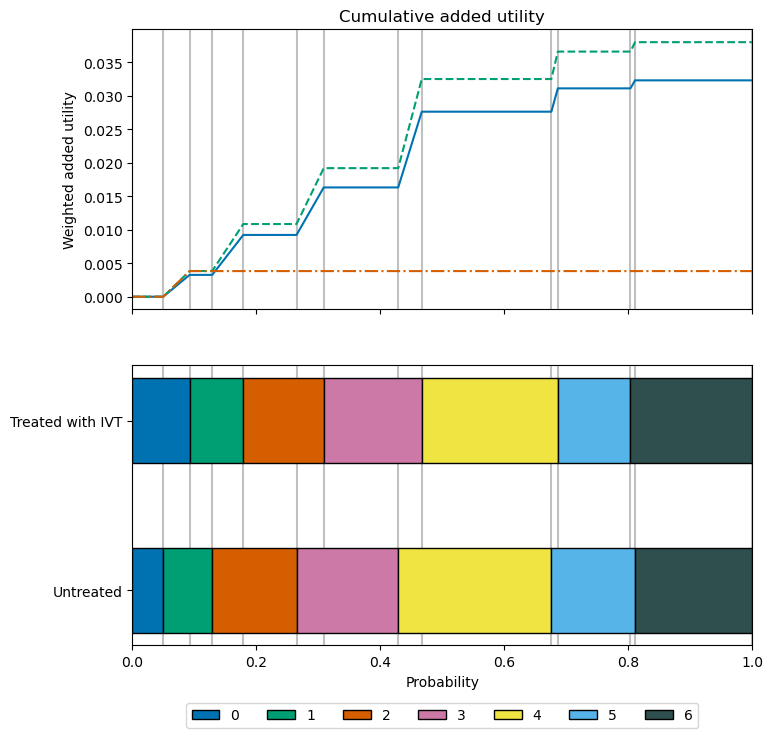

In [22]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(8,8))

y_vals = [0,1]
y_labels = ['Untreated', 'Treated with IVT']

draw_horizontal_bar(mRS_dist2, y_vals[0], ax=axs[1])
plt.legend(loc='center', ncol=7, bbox_to_anchor=(0.5,0.0,0.0,-0.5))
draw_horizontal_bar(mRS_dist1, y_vals[1], ax=axs[1])

axs[0].plot(mRS_dist_mix, weighted_added_utils_equal, label='Equal', 
            linestyle='-')
axs[0].plot(mRS_dist_mix, weighted_added_utils_best, label='Best-case', 
            linestyle='--')
axs[0].plot(mRS_dist_mix, weighted_added_utils_worst, label='Worst-case', 
            linestyle='-.')
axs[0].set_ylabel('Weighted added utility')
axs[0].set_title('Cumulative added utility')

for ax in axs:
    for boundary in mRS_dist_mix:
        ax.axvline(boundary, color='silver', zorder=0)

axs[1].set_xlim(0,1)
axs[1].set_xlabel('Probability')
axs[1].set_yticks(y_vals)
axs[1].set_yticklabels(y_labels)
plt.show()